### Mnist DataTypes

In [1]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [2]:
import tensorflow.keras as keras
import tensorflow as tf



In [3]:
print(tf.__version__)

2.3.1


In [4]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test ,axis=1)

In [5]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
import matplotlib.pyplot as plt

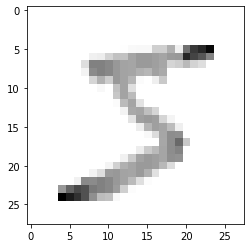

In [7]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [8]:
print(y_train[0])

5


## Creating a model

In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2614 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0728 - accuracy: 0.9770


In [10]:
val_loss,val_acc=model.evaluate(X_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9718
0.08703900873661041 0.9718000292778015


In [11]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [12]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [13]:
predictions=new_model.predict([X_test])

In [14]:
print(predictions)

[[3.52338141e-08 8.20867513e-07 1.24498356e-05 ... 9.99968648e-01
  4.81031925e-08 1.14634425e-07]
 [5.89917493e-09 7.99069833e-03 9.92004693e-01 ... 4.53294929e-10
  1.19330664e-07 4.46605730e-12]
 [1.79776531e-08 9.99907255e-01 5.20817775e-06 ... 3.39272374e-05
  4.74921617e-05 1.17411128e-06]
 ...
 [2.53404409e-08 3.40852949e-07 3.54482353e-07 ... 3.86657521e-05
  3.25821452e-06 8.71510711e-05]
 [8.49039316e-06 5.79828310e-08 6.55646986e-08 ... 6.04248882e-08
  7.40741007e-03 5.05325261e-07]
 [8.62510205e-05 1.50139385e-08 4.56897737e-07 ... 7.57032423e-11
  5.62366949e-07 2.65297757e-07]]


In [17]:
import numpy as np
print(np.argmax(predictions[20]))

9


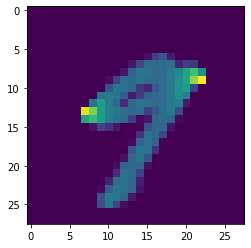

In [18]:
plt.imshow(X_test[20])
plt.show()